In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
votes=pd.read_csv("F:/dataquest dataset/114_congress.csv")
votes.head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,Blumenthal,D,CT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
6,Blunt,R,MO,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7,Booker,D,NJ,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
8,Boozman,R,AR,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9,Boxer,D,CA,0.5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [3]:
votes.columns

Index(['name', 'party', 'state', '00001', '00004', '00005', '00006', '00007',
       '00008', '00009', '00010', '00020', '00026', '00032', '00038', '00039',
       '00044', '00047'],
      dtype='object')

In [4]:
votes.shape[0]

100

In [5]:
ct=votes['party'].value_counts()
ct.to_frame()

,party
R,54
D,44
I,2


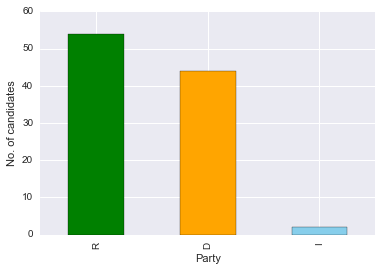

In [11]:
ct.plot(kind='bar',color=['g','orange','skyblue'])
plt.tick_params(bottom='off',top='off',right='off',left='off')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Party')
plt.ylabel("No. of candidates")
plt.show()

In [12]:
votes.mean()

00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64

In [13]:
from sklearn.metrics.pairwise import euclidean_distances
distance=euclidean_distances(votes.iloc[0,3:].reshape(1,-1),votes.iloc[1,3:].reshape(1,-1))
distance

array([[ 1.73205081]])

In [28]:
from sklearn.cluster import KMeans
kmeans_model=KMeans(n_clusters=2,random_state=1)
senator_distances=kmeans_model.fit_transform(votes.iloc[:,3:])
labels=kmeans_model.labels_

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0])

In [29]:
votes['distance_cluster1']=senator_distances[:,0]
votes['distance_cluster2']=senator_distances[:,1]
votes['labels']=labels

In [30]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,...,00020,00026,00032,00038,00039,00044,00047,distance_cluster1,distance_cluster2,labels
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.469779,1.516737,1
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.519653,2.621955,1
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.453990,5.343257,0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,5.379691,0.429082,1
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.688980,4.246000,0


In [31]:
pd.crosstab(labels,votes['party'])

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


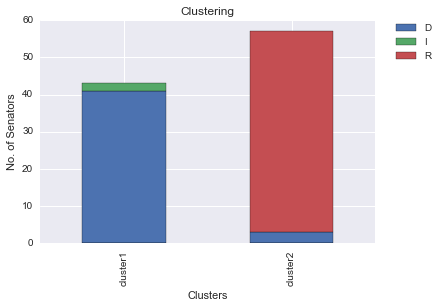

In [32]:
pd.crosstab(labels,votes['party']).plot(kind='bar',stacked=True)
x=[0,1]
l=['cluster1','cluster2']
plt.xticks(x,l)
plt.title('Clustering')
plt.xlabel('Clusters')
plt.ylabel('No. of Senators')
plt.tick_params(bottom='off',top='off',right='off',left='off')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [33]:
democratic_outlier=votes[(labels==1) & (votes['party']=='D')]
democratic_outlier[['name','party']]

,name,party
42,Heitkamp,D
56,Manchin,D
74,Reid,D


In [34]:
independents_like_democrats=votes[(labels==0) &(votes['party']=='I')]
independents_like_democrats[['name','party']]

,name,party
50,King,I
79,Sanders,I


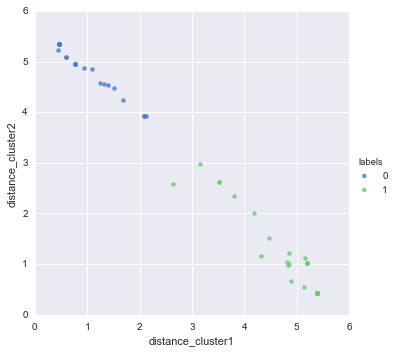

In [55]:
sns.lmplot(x='distance_cluster1',y='distance_cluster2',hue='labels',data=votes,fit_reg=False,palette='muted')

In [45]:
extremism = (senator_distances ** 3).sum(axis=1)
votes['extremism']=extremism
votes.sort_values('extremism',inplace=True,ascending=False)

In [46]:
votes[['name','party','extremism']].head(5)

,name,party,extremism
24,Cotton,R,155.773026
23,Cornyn,R,155.773026
25,Crapo,R,155.773026
58,McCain,R,155.773026
27,Daines,R,155.773026
